In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision  
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import csv
import os
from os import listdir
import torch
from PIL import Image
import torchvision.transforms as transforms
import sys
import array
import tensorflow as tf
import torchtext
from torch.nn.utils.rnn import pack_padded_sequence

In [2]:
data = [] #total cleaned data array

# all_ingredients = set({}) #total types of ingredients data set

# Reading AllRecipes CSV file
#['Recipe Name;Review Count;Recipe Photo;Author;Prepare Time;Cook Time;Total Time;Ingredients;Directions;RecipeID']
#   0           1               2          3        4           5           6           7         8         9
os.chdir(r"D:\APS360\Primary Model\allrecipes")
with open('clean_recipes.csv', mode='r') as f:
    read = f.readlines()
    n = -1
    for line in read:
        tmp1, tmp2, tmp3 = [], [], []
        tmp1 += line.split(';')
        tmp2.append(tmp1[0]) #Recipe name
        tmp2.append(tmp1[2]) #Recipe photo URL
        tmp3 = tmp1[7].split(',') #spliced cleaned ingredients
        tmp2.append(tmp3)
        # print(tmp3)
        # all_ingredients.update(tmp3)
        # for j in range (0, len(tmp3)):
        #     tmp_point = tmp3[j]
        #     all_ingredients.update(tmp_point)

        # all_ingredients |= set(tmp3)
        tmp2.append(tmp1[8].split('**')) #spliced cooking directions
        tmp2.append(n)
        data.append(tmp2) #add to total list
        n += 1

del data[0] #remove label row


print("Original Data Loading Done.")

print("Loading Done.")
print(len(data))

Original Data Loading Done.
Loading Done.
12351


In [3]:
# #list with index values of invalid images
trashIndex = [12331, 12328, 12310, 12301, 12291, 12299, 12274, 12263, 12257, 12252, 12243, 12238, 12234, 12221, 12217, 12212, 12207, 12162, 12136, 12131, 12119, 12118, 12111, 12080, 12077, 12067, 12040, 12038, 12032, 12022, 12020, 12018, 12016, 12013, 11997, 11993, 11954, 11950, 11945, 11926, 11916, 11897, 11888, 11882, 11863, 11861, 11859, 11857, 11856, 11855, 11854, 11849, 11843, 11841, 11786, 11785, 11779, 11769, 11752, 11723, 11720, 11705, 11668, 11662, 11640, 11634, 11604, 11556, 11514,
11500, 11490, 11463, 11425, 11386, 11384, 11383, 11377, 11369, 11367, 11362, 11359, 11357, 11355, 11351, 11347, 11302, 11288, 11265, 11264, 11263, 11261, 11260, 11249,
11229, 11172, 11163, 11158, 11151, 11139, 11114, 11113, 11112, 11107, 11077, 11037, 11023, 11002, 10980, 10965, 10953, 10913, 10906, 10903, 10886, 10864, 10863, 10860, 10840, 10824, 10796, 10774, 10748, 10744, 10743, 10738, 10737, 10736, 10731, 10723, 10722, 10701, 10683, 10665, 10658, 10645, 10644, 10641, 10630, 10592, 10586, 10565, 10564, 10550, 10546, 10542, 10519, 10510, 10484, 10480, 10469, 10461, 10439, 10419, 10408, 10377, 10369, 10364, 10337, 10334, 10325, 10323, 10314, 10313, 10311, 10306, 10301, 10229, 10209,
10191, 10178, 10174, 10165, 10153, 10145, 10136, 10104, 10100, 10082, 10066, 10059, 10051, 10047, 9997, 9983, 9978, 9969, 9965, 9951, 9909, 9907, 9901, 9897, 9890, 9865, 9859, 9844, 9839, 9828, 9820, 9816, 9804, 9767, 9766, 9756, 9736, 9717, 9683, 9666, 9654, 9637, 9636, 9622, 9619, 9606, 9599, 9596, 9595, 9566, 9559, 9509, 9500, 9495, 9472, 9466, 9461, 9424, 9423, 9422, 9398, 9386, 9385, 9373, 9330, 9327, 9323, 9299, 9283, 9274, 9245, 9240, 9227, 9195, 9149, 9098, 9035, 9022, 8980, 8976, 8974, 8920, 8917, 8915, 8911, 8910, 8895, 8888, 8887, 8884, 8878, 8872, 8862, 8850, 8838, 8811, 8804, 8757, 8739, 8737, 8724, 8637, 8636, 8635,
8630, 8629, 8612, 8610, 8607, 8567, 8546, 8544, 8533, 8521, 8514, 8505, 8488, 8469, 8466, 8459, 8442, 8401, 8385, 8382, 8380, 8373, 8351, 8348, 8340, 8339, 8336, 8325, 8321, 8305, 8281, 8273, 8243, 8238, 8230, 8206, 8204, 8175, 8166, 8165, 8160, 8159, 8158, 8152, 8149, 8145, 8141, 8132, 8115, 8099, 8096, 8091, 8079, 8067, 8063, 8034, 8033, 8024, 8007, 7974, 7921, 7920, 7911, 7906, 7903, 7902, 7898, 7895, 7893, 7892, 7890, 7889, 7885, 7872, 7871, 7855, 7824, 7815, 7809, 7772, 7761, 7745, 7713, 7712, 7707, 7704, 7688, 7667, 7665, 7642, 7640, 7625, 7577, 7542, 7539, 7533, 7529, 7512, 7494, 7488, 7484, 7477, 7464, 7459, 7388, 7366, 7365, 7352, 7350, 7323, 7314, 7279, 7258,
7257, 7256, 7216, 7185, 7175, 7165, 7163, 7119, 7111, 7089, 7050, 6999, 6927, 6896, 6879, 6850, 6791, 6742, 6736, 6728, 6700, 6681, 6655, 6637, 6567, 6542, 6541, 6533, 6513, 6503, 6494, 6481, 6471, 6435, 6425, 6408, 6392, 6384, 6365, 6347, 6341, 6338, 6334, 6330, 6314, 6313, 6237, 6220, 6200, 6177, 6174, 6155, 6144, 6140, 6082, 6069, 5993, 5980, 5975, 5968, 5957, 5954, 5953, 5949, 5941, 5932, 5929, 5926, 5915, 5897, 5840, 5817, 5815, 5805, 5784, 5725, 5724, 5715, 5711, 5710, 5706, 5693, 5692, 5685, 5676, 5656, 5650, 5579, 5560, 5449, 5350, 5332, 5324, 5313, 5299, 5298, 5294, 5278, 5273, 5270, 5269, 5263, 5163, 5162, 5154, 5124, 5091, 5080, 8063, 5055, 5053, 5048,
5045, 5042, 5037, 4992, 4990, 4980, 4969, 4956, 4891, 4886, 4882, 4850, 4845, 4837, 4832, 4816, 4812, 4803, 4801, 4791, 4790, 4789, 4769, 4738, 4687, 4675, 4661, 4660, 4632, 4626, 4625, 4603, 4587, 4582, 4581, 4559, 4538, 4527, 4525, 4518, 4505, 4504, 4497, 4496, 4456, 4432, 4425, 4411, 4361, 4316, 4304, 4214, 4204, 4197, 4188, 4183, 4169, 4167, 4140, 4139, 4127, 4122, 4120, 4115, 4107, 4105, 4097, 4090, 4076, 4073, 4069, 4068, 4059, 4055, 4046, 4044, 4042, 4036, 4035, 4033, 4029, 4028, 4026, 4019, 4006, 3995, 3990, 3989, 3974, 3959, 3954, 3943, 3931, 3899, 3897, 3896, 3891, 3876, 3858, 3844, 3836, 3833, 3832, 3831, 3828, 3819, 3783, 3781, 3777, 3769, 3767, 3756, 3745, 3728, 3725,
3675, 3617, 3612, 3562, 3549, 3532, 3513, 3498, 3451, 3444, 3439, 3438, 3428, 3422, 3418, 3416, 3406, 3399, 3395, 3374, 3358, 3356, 3344, 3343, 3332, 3329, 3317, 3302, 3282, 3277, 3263, 3257, 3252, 3247, 3245, 3224, 3221, 3214, 3213, 3209, 3208, 3206, 3194, 3185, 3183, 3182, 3181, 3177, 3167, 3162, 3136, 3131, 3118, 3117, 3106, 3100, 3090, 3087, 3085, 3075, 3072, 3070, 3062, 3061, 3052, 3039, 3029, 3026, 3018, 3013, 3012, 2988, 2978, 2976, 2956, 2952, 2949, 2943, 2933, 2929, 2901, 2896, 2887, 2886, 2868, 2864, 2855, 2845, 2842, 2831, 2829, 2820, 2816, 2812, 2806, 2792, 2779, 2772, 2770, 2769, 2766, 2763, 2756, 2739, 2737, 2733, 2731, 2727, 2723, 2720, 2718, 2713, 2708, 2700, 2683, 2681, 2672,
2663, 2643, 2637, 2635, 2632, 2631, 2626, 2624, 2614, 2607, 2597, 2594, 2592, 2591, 2590, 2585, 2580, 2561, 2559, 2554, 2553, 2552, 2548, 2530, 2529, 2511, 2502, 2491, 2484, 2483, 2453, 2452, 2447, 2446, 2428, 2425, 2409, 2407, 2398, 2396, 2367, 2363, 2356, 2355, 2349, 2344, 2297, 2293, 2287, 2274, 2269, 2264, 2253, 2242, 2222, 2219, 2210, 2199, 2195, 2181, 2170, 2165, 2164, 2152, 2150, 2149, 2143, 2098, 2091, 2089, 2085, 2083, 2082, 2079, 2076, 2073, 2070, 2063, 2061, 2051, 2045, 2038, 2036, 2033, 2032, 2030, 2029, 2027, 2021, 2019, 2012, 2001, 1992, 1985, 1981, 1975, 1959, 1957, 1946, 1936, 1910, 1875, 1873, 1843, 1827, 1813, 1809, 1799, 1787, 1782, 1778, 1770, 1768, 1758, 1754,
1746, 1742, 1739, 1736, 1733, 1729, 1723, 1720, 1713, 1697, 1691, 1627, 1626, 1599, 1594, 1584, 1578, 1577, 1543, 1509, 1487, 1419, 1412, 1351, 1336, 1310, 1287, 1254, 1226, 1194, 1174, 1102, 1090, 1067, 1032, 1029, 1014, 990, 988, 984, 970, 961, 957, 944, 934, 928, 920, 917, 904, 870, 868, 834, 820, 807, 806, 776, 773, 772, 762, 756, 755, 752, 731, 726, 721, 718, 714, 709, 692, 688, 674, 672, 670, 669, 665, 663, 659, 652, 650, 626, 617, 612, 593, 591, 583, 574, 544, 538, 537, 523, 522, 502, 494, 479, 470, 469, 461, 456, 449, 439, 431, 430, 418, 403, 399, 389, 382, 347, 344, 342, 341, 338, 337, 301, 295, 291, 287, 274, 260, 239, 237, 236, 235, 228, 219, 210, 163, 102, 93, 78, 60]

# # print(len(data))
# # print(len(trashIndex))


#deleting images and data entries at specified indices
for i in range (0, len(trashIndex)):
    del data[trashIndex[i]]

# # print(len(data))
print("Data Cleaning Complete.")
print(len(data))

Data Cleaning Complete.
11376


In [4]:
import os
from os import listdir

main_list = [] #main data list, organized in sequence of: image tensor, spliced ingredients list
#define universal image transform
transform = transforms.Compose([transforms.PILToTensor()])
# folder_dir = "images"
index = 0
os.chdir(r"D:\APS360\Primary Model\allrecipes\images") #replace directory here to system directory to image folder

for i in range(0, len(data)):
    try:
        tmp = []
        image = Image.open(str(data[i][4])+'.jpg')
        tmp_tensor = transform(image)
        tmp.append(tmp_tensor)
        tmp.append(data[i][2])
        # tmp.append(data[index][3]) #adding cooking directions
        main_list.append(tmp)
    except:
        pass


# os.chdir("..") #reset directory to previous layer
os.chdir(r"D:\APS360\Primary Model\allrecipes\images")
print(len(main_list))
print(len(data))

11374
11376


In [5]:
# Only keeping images with the right tensor size
data_list = []
for i in range(len(main_list)):
  if main_list[i][0].size()==torch.Size([3, 224, 224]):
    data_list.append(main_list[i])
print(len(data_list))

# Checking for None
for i in range(len(data_list)):
  if data_list[i]==None:
    print(i)

# Dividing into training and validation data
split = int(6/7*len(data_list))
data_train = data_list[:split]
data_val = data_list[split:]

11368


In [39]:
#code referenced from https://medium.com/@deepeshrishu09/automatic-image-captioning-with-pytorch-cf576c98d319
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = torchvision.models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.batch= nn.BatchNorm1d(embed_size,momentum = 0.01)
        
    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.batch(self.embed(features))
        return features

In [40]:
#code referenced from https://medium.com/@deepeshrishu09/automatic-image-captioning-with-pytorch-cf576c98d319

class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embed_size= embed_size
        self.vocabulary_size = vocab_size
        self.lstm = nn.LSTM(self.embed_size, self.hidden_size , self.num_layers,batch_first=True)
        self.embed = nn.Embedding(self.vocabulary_size, self.embed_size)#,padding_idx=794)
        self.fc = nn.Linear(hidden_size, self.vocabulary_size)
    
    def init_hidden(self, batch_size):
        return (torch.zeros((1, batch_size, self.hidden_size)), 
                torch.zeros((1, batch_size, self.hidden_size)))
    
    def forward(self, features, captions):
        batch_size = features.shape[0] # features is of shape (batch_size, embed_size)
        self.hidden = self.init_hidden(batch_size) 
        
        embeddings = self.embed(captions)
        features = features.unsqueeze(1)
        embeddings = torch.cat((features, embeddings), dim=1)
        hiddens, c = self.lstm(embeddings, self.hidden)
        outputs = self.fc(hiddens[:, :-1,:])
        return outputs

In [8]:
#creating ingredient map
counter = 0
ing_map = {}
num_map = {}

for i in range(len(data_train)):
    for k in range(len(data_train[i][1])):
        try:
            ing_map[data_train[i][1][k]]
        except:
            ing_map.update({data_train[i][1][k] : counter})
            num_map.update({counter : data_train[i][1][k]})
            counter += 1

size = len(ing_map)
print(size)

792


In [9]:
#referenced from https://medium.com/@deepeshrishu09/automatic-image-captioning-with-pytorch-cf576c98d319

def clean_sentence(output):
    list_string = []
    
    for idx in output:
        #if (num_map[idx.item()] == "<pad>"):
            #break
        #if (num_map[idx.item()] != "<end>"):
        list_string.append(num_map[idx.item()])
    
    #list_string = list_string[1:-1] # Discard <start> and <end> words
    sentence = ' '.join(list_string) # Convert list of string to full string
    sentence = sentence.capitalize()  # Capitalize the first letter of the first word
    return sentence

In [10]:
#cleans the decoder's output as a sentence

def clean_output(output):
    list_string = []
    sizes = []
    size = 0
    ing = []
    copy = False
    max_value = 0
    max_index = 0
    
    for idx in output:
        for k in range(len(idx)):
            if (idx[k] > max_value):
                max_value = idx[k]
                max_index = k
        #if ((num_map[max_index] != "<start>") and (num_map[max_index] != "<end>") and (num_map[max_index] != "<pad>")):
        
        for j in range(len(ing)):
            if (max_index == ing[j]):
                copy = True
                break
        if (copy):
            copy = False
            continue
        ing.append(max_index)

        #if (num_map[max_index] != "<end>"):
        list_string.append(num_map[max_index])
        size += 1
        
        max_value = 0
        #for i in range(len(idx)):
    sizes.append(size)
    size = 0

    #list_string = list_string[1:-1] # Discard <start> and <end> words
    sentence = ' '.join(list_string) # Convert list of string to full string
    sentence = sentence.capitalize()  # Capitalize the first letter of the first word
    return sentence

In [11]:
#cleans the decoder's output into the ingredient map numbers
def clean_output_indexs(output):
    list_string = []
    sizes = []
    size = 0
    max_value = 0
    max_index = 0
    for idx in output:
        for k in range(len(idx)):
            if (idx[k] > max_value):
                max_value = idx[k]
                max_index = k

        list_string.append(max_index)
        size += 1
        
        max_value = 0
    sizes.append(size)
    size = 0

    return list_string    

In [12]:
#converts string ingredients into their assigned numbers

def convert_list_to_num(lists):
    ans = []
    for i in range(0,len(lists)):
        ans.append(ing_map[lists[i]])
    return ans

In [13]:
#sort data by number of ground ingredietns to prevent padding 

ing_list_len = []

for i in data_train:
    ing_list_len.append(len(i[1]))

#print(ing_list_len[0])
ing_list_len = torch.IntTensor(ing_list_len)
#ing_list_len.reshape([1,len(ing_list_len)])


sorted_inglist, sort_ind = ing_list_len.sort(dim=0, descending=False)
print(sorted_inglist)
print(sort_ind)

tensor([ 1,  1,  1,  ..., 25, 25, 30], dtype=torch.int32)
tensor([7854, 9322,   63,  ..., 3206, 7403, 6562])


In [14]:
def get_accuracy(outputs,gnd_ing):
    fp = 0
    fn = 0
    tp = 0
    tn = 0

    ing = []

    duplicate = False
    false_ing = True

    for i in range(len(outputs)):
        false_ing = True
        for k in range(len(gnd_ing)):
            if (outputs[i] == gnd_ing[k]):
                tp += 1
                ing.append(gnd_ing[k])
                false_ing = False
                break
        if (false_ing):

            for j in range(len(ing)):
                if (outputs[i] == ing[j]):
                    duplicate = True
                    break

            if (duplicate == False):
                ing.append(outputs[i])
                fp += 1
            else:
                duplicate = False
    fn = len(gnd_ing) - tp

    tn = vocab_size - tp - fn - fp
    return ((tp + tn)/(tp + fp + fn + tn))

In [15]:
def train(encoder, decoder, num_epochs,batch_size,criterion,optimizer,vocab_size):
    iters, losses,accuracy = [],[],[]
    counter = batch_size
    index = 0
    current_size = 3
    accuracy_total = 0
    for epoch in range(0, num_epochs):

            images = []
            ing_list = []
            counter = batch_size
            while (counter > 0):
                

                try:
                    sorted_inglist[index]
                except:
                    index = 0
                #if the dataset has more than 2 ingredients
                if (sorted_inglist[index] >= 3):

                    #if the sizes aren't the same
                    if (sorted_inglist[index] != current_size):
                        current_size = sorted_inglist[index]
                        ing_list = []
                        images = []
                        counter = batch_size
                    else:
                        images.append(data_train[sort_ind[index]][0])
                        temp = convert_list_to_num(data_train[sort_ind[index]][1])
                        temp = torch.IntTensor(temp)
                        ing_list.append(temp)
                        counter -= 1

                
                index += 1
            print("index ",index)
            """
            for i in range(0,batch_size):
                images.append(data_train[i + epoch*batch_size][0])
                temp = convert_list_to_num(data_train[i+ epoch*batch_size][1])
                temp = torch.IntTensor(temp)
                ing_list.append(temp)

                ing_list_len.append(len(data_train[i + epoch*batch_size][1]))
            """    
            print("len ",len(ing_list))
            if (len(ing_list) > 0):
                print(epoch)
                images = torch.stack(images)
                images = images.reshape([len(images), 3, 224, 224])
                images = images.type(torch.FloatTensor)

                ing_list = torch.stack(ing_list)
                ing_list = ing_list.type(torch.IntTensor)
                #print(ing_list)
                # Zero the gradients.
                decoder.zero_grad()
                encoder.zero_grad()
                
                #try:
                    # Pass the inputs through the CNN-RNN model.
                features = encoder(images)
                outputs = decoder(features, ing_list)
                #print(outputs.shape)
                #except:
                    #continue
                sizes = []
                #if (epoch == num_epochs - 1):
                
                temp2 = index - 32

                for i in range(batch_size):
                    accuracy_temp = get_accuracy(clean_output_indexs(outputs[i]),ing_list[i])

                accuracy.append(float(accuracy_temp)/batch_size)
                accuracy_total += float(accuracy_temp)/batch_size

                if (epoch == num_epochs - 1):
                    images = images.type(torch.IntTensor)
                    for i in range(batch_size):
                        #print(images[i].shape)
                        #print("title", tmp2[sort_ind[temp2]])
                        print("image")
                        plt.imshow(images[i].permute(1, 2, 0))
                        plt.show()

                        #print("image 2")
                        #plt.imshow(data_train[sort_ind[index - 1]][0].permute(1,2,0))
                        #plt.show()
                        print("ground ing: ",clean_sentence(ing_list[i]),"\n")
                        #print("ground ing: ",data_train[sort_ind[temp2]][1],"\n")
                        sentence = clean_output(outputs[i])
                        print("predicted ing: ",sentence,"\n\n")
                        temp2 += 1
                #outputs.reshape([32,796,32])
                #print(outputs.shape)
                #for i in range(batch_size):
                #scores,_ = pack_padded_sequence(outputs,sizes, batch_first=True, enforce_sorted = False)
                #targets,_ = pack_padded_sequence(ing_list,sizes,batch_first=True, enforce_sorted = False)

                # Calculate the batch loss.
        #         print("outputs.shape: ", outputs.shape)
                #print(outputs.shape)
                #print(outputs.view(-1,vocab_size).shape)
                #print(ing_list.shape)
                #print(ing_list.view(-1).long().shape)
                loss = criterion(outputs.view(-1, vocab_size), ing_list.view(-1).long())
                #loss = criterion(scores, targets)
                # Backward pass.

                #decoder_optimizer.zero_grad()
                #encoder_optimizer.zero_grad()

                loss.backward()
                
                # Update the parameters in the optimizer.
                optimizer.step()
                optimizer.zero_grad() 

                #decoder_optimizer.step()
                #encoder_optimizer.step()

                iters.append(epoch)
                losses.append(float(loss)/batch_size)
                

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Accuracy Curve")
    plt.plot(iters,accuracy,label = "Train")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    accuracy_batches = 0
    for i in range(len(accuracy)):
        accuracy_batches += accuracy[i]

    print("avg accuracy: ",accuracy_batches/(num_epochs))

index  186
len  64
0
index  250
len  64
1
index  314
len  64
2
index  378
len  64
3
index  442
len  64
4
index  506
len  64
5
index  591
len  64
6
index  655
len  64
7
index  719
len  64
8
index  783
len  64
9
index  847
len  64
10
index  911
len  64
11
index  975
len  64
12
index  1039
len  64
13
index  1103
len  64
14
index  1167
len  64
15
index  1272
len  64
16
index  1336
len  64
17
index  1400
len  64
18
index  1464
len  64
19
index  1528
len  64
20
index  1592
len  64
21
index  1656
len  64
22
index  1720
len  64
23
index  1784
len  64
24
index  1848
len  64
25
index  1912
len  64
26
index  1976
len  64
27
index  2040
len  64
28
index  2104
len  64
29
index  2168
len  64
30
index  2248
len  64
31
index  2312
len  64
32
index  2376
len  64
33
index  2440
len  64
34
index  2504
len  64
35
index  2568
len  64
36
index  2632
len  64
37
index  2696
len  64
38
index  2760
len  64
39
image


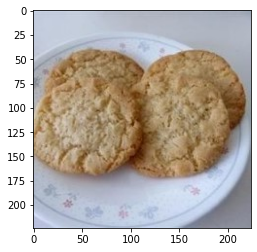

ground ing:  White sugar flour mayonnaise baking soda salt vanilla 

predicted ing:  Flour egg salt 


image


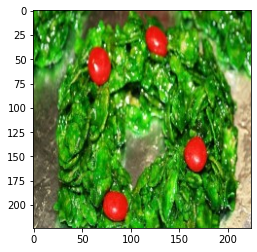

ground ing:  Butter marshmallow food coloring vanilla cereal cinnamon 

predicted ing:  Lemon white sugar vanilla chocolate 


image


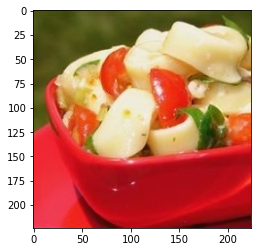

ground ing:  Cheese spinach parmesan cherry olive salad dressing 

predicted ing:  Onion garlic 


image


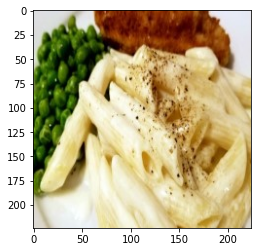

ground ing:  Butter cream cheese garlic milk parmesan black pepper 

predicted ing:  Chicken white sugar 


image


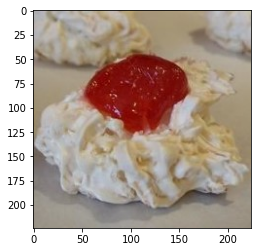

ground ing:  Coconut white sugar egg cornstarch almond cherry 

predicted ing:  White sugar vanilla egg 


image


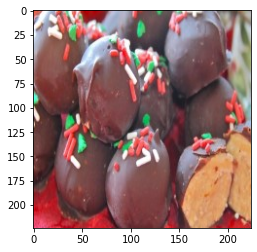

ground ing:  Butter peanut butter sugar vanilla tea chocolate 

predicted ing:  Chocolate sugar 


image


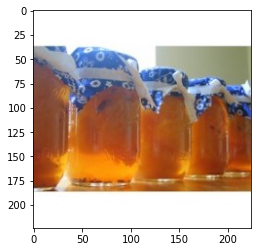

ground ing:  Peach white sugar vinegar water clove cinnamon 

predicted ing:  White sugar egg vanilla 


image


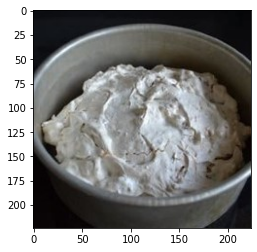

ground ing:  Egg white sugar baking powder soda vanilla pecan 

predicted ing:  White sugar 


image


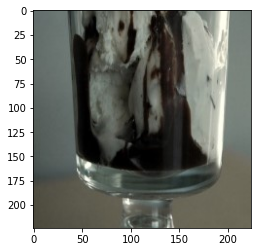

ground ing:  Chocolate butter sugar milk vanilla salt 

predicted ing:  White sugar milk vanilla 


image


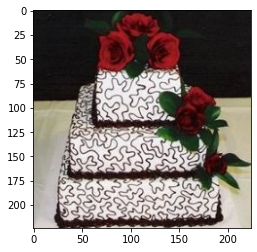

ground ing:  Sugar shortening milk salt butter vanilla 

predicted ing:  Butter vanilla 


image


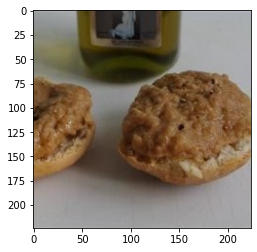

ground ing:  Eggplant onion olive dill kosher black pepper 

predicted ing:  Chocolate egg butter garlic salt 


image


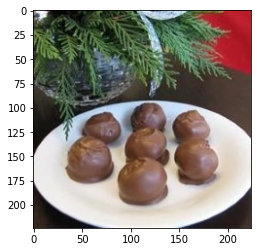

ground ing:  Peanut butter butter sugar ham chocolate shortening 

predicted ing:  Butter chocolate sugar vanilla 


image


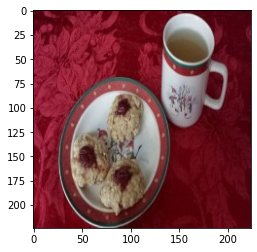

ground ing:  Oat water milk raisin cinnamon honey 

predicted ing:  White sugar vanilla 


image


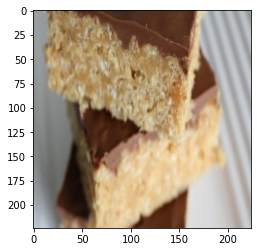

ground ing:  White sugar corn syrup peanut butter cereal chocolate butter 

predicted ing:  Butter egg chocolate 


image


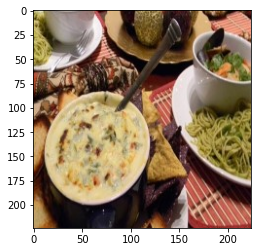

ground ing:  Cheese cream tomato onion bell pepper spinach 

predicted ing:  Cream cheese onion white sugar pepper 


image


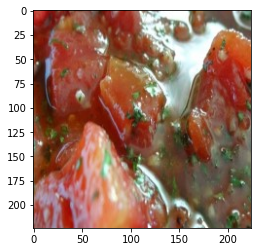

ground ing:  Tomato olive garlic parsley salt black pepper 

predicted ing:  Chicken onion garlic pepper black pepper 


image


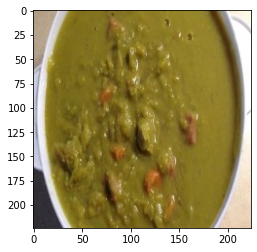

ground ing:  Leftovers onion garlic black pepper pea carrot 

predicted ing:  Onion pepper 


image


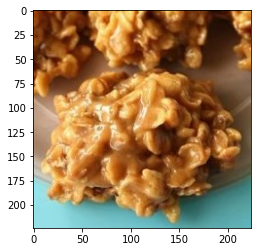

ground ing:  White sugar peanut butter corn syrup protein vanilla salt 

predicted ing:  Butter egg chocolate 


image


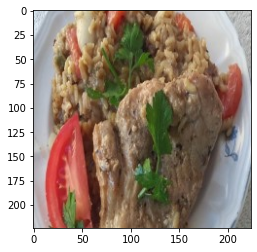

ground ing:  Onion water rice mushroom pepper pork chop 

predicted ing:  Chicken garlic salt pepper onion 


image


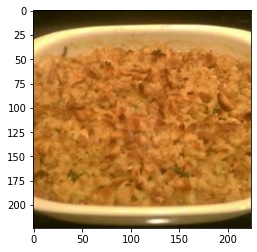

ground ing:  Chicken corn carrot chicken turkey 3 cups prepared stuffing 

predicted ing:  White sugar garlic onion 


image


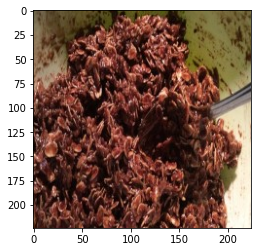

ground ing:  Shortening milk white sugar coconut oat cocoa powder 

predicted ing:  Chocolate vanilla egg 


image


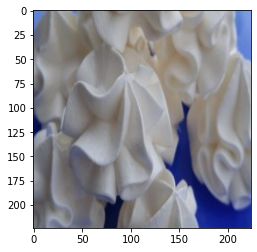

ground ing:  Egg salt cream vanilla white sugar chocolate 

predicted ing:  Butter white sugar vanilla 


image


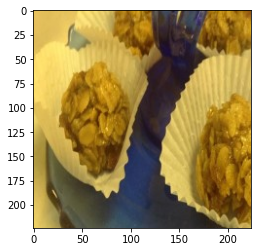

ground ing:  Oat brown sugar vegetable oil egg salt almond 

predicted ing:  Cream cheese egg flour vanilla 


image


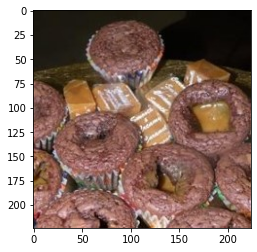

ground ing:  Milk chocolate butter chocolate walnut caramel 

predicted ing:  Butter chocolate 


image


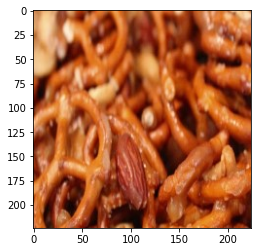

ground ing:  Pretzel nut butter brown sugar corn syrup salt 

predicted ing:  Butter egg flour vanilla 


image


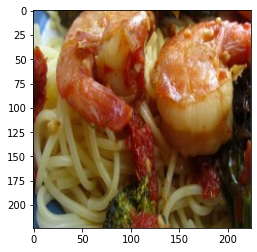

ground ing:  Shrimp broccoli tomato garlic butter pasta 

predicted ing:  Chicken garlic pepper white sugar 


image


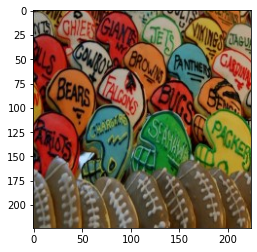

ground ing:  Sugar butter vanilla milk food coloring sugar 

predicted ing:  Water milk flour vanilla 


image


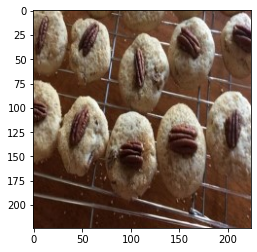

ground ing:  Butter brown sugar egg flour salt pecan 

predicted ing:  Butter egg flour vanilla white sugar 


image


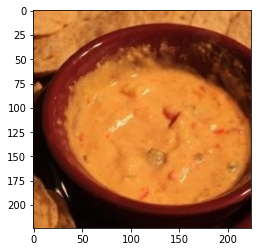

ground ing:  Cheese onion tomato pepper bell pepper bell pepper 

predicted ing:  Chicken onion pepper 


image


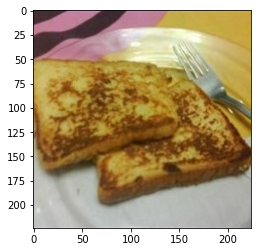

ground ing:  Egg white sugar milk liqueur orange bread 

predicted ing:  Butter white sugar flour vanilla 


image


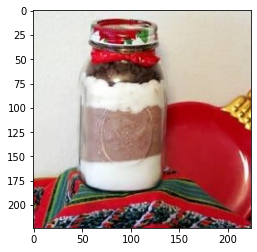

ground ing:  White sugar cocoa powder pecan flour baking powder salt 

predicted ing:  White sugar egg vanilla salt 


image


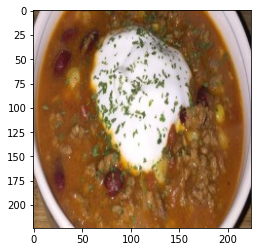

ground ing:  Ground beef onion tomato sauce tomato corn bean 

predicted ing:  Chicken onion pepper 


image


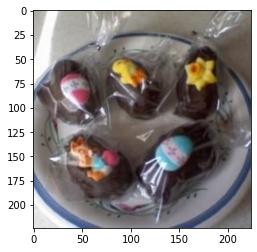

ground ing:  Peanut butter butter sugar cereal chocolate shortening 

predicted ing:  White sugar sugar vanilla chocolate 


image


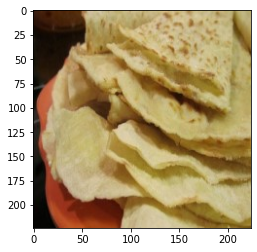

ground ing:  Potato butter cream salt white sugar flour 

predicted ing:  Butter egg 


image


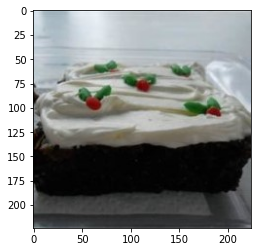

ground ing:  White sugar butter chocolate egg flour pecan 

predicted ing:  Butter egg vanilla 


image


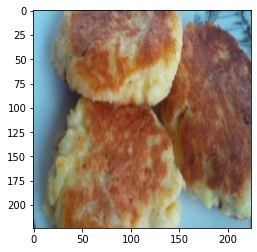

ground ing:  Potato egg onion salt black pepper olive 

predicted ing:  Chicken butter white sugar pepper black pepper salt 


image


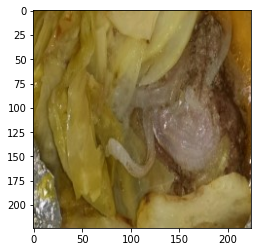

ground ing:  Ground beef onion carrot potato salt black pepper 

predicted ing:  Chicken onion pepper black pepper 


image


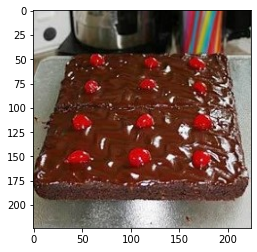

ground ing:  Shortening cocoa powder white sugar egg flour vanilla 

predicted ing:  White sugar vanilla 


image


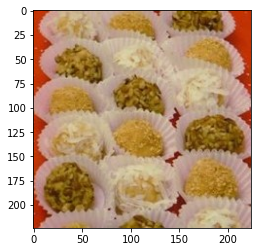

ground ing:  Vanilla sugar butter orange juice pecan coconut 

predicted ing:  Flour egg 


image


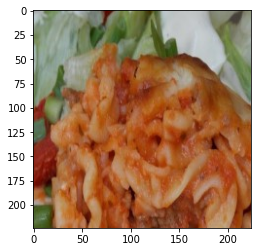

ground ing:  Pasta ground beef onion mushroom spaghetti mozzarella 

predicted ing:  Chicken butter onion pepper 


image


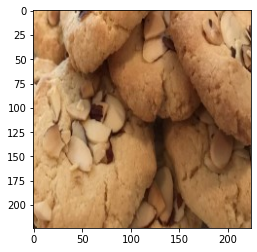

ground ing:  Butter white sugar egg flour almond amaretto 

predicted ing:  Butter flour 


image


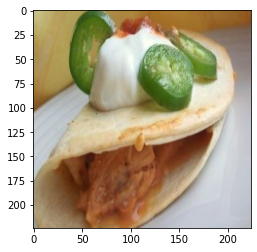

ground ing:  Chicken vegetable oil onion salsa tortillas monterey jack 

predicted ing:  Chicken garlic onion pepper 


image


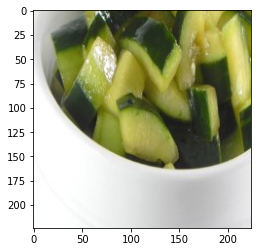

ground ing:  Cucumber salt vegetable oil white sugar vinegar soy sauce 

predicted ing:  Onion black pepper salt 


image


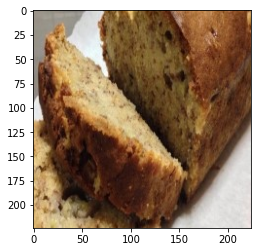

ground ing:  Margarine white sugar egg banana flour baking soda 

predicted ing:  Butter egg flour vanilla salt 


image


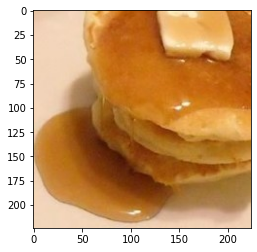

ground ing:  Flour baking powder salt egg milk vegetable oil 

predicted ing:  Butter white sugar salt egg vanilla 


image


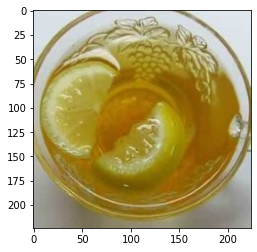

ground ing:  Water white sugar clove cinnamon apple juice lemon 

predicted ing:  Lemon white sugar salt 


image


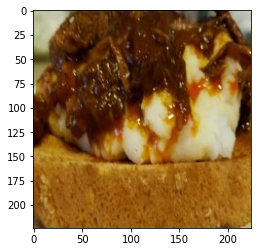

ground ing:  Roast onion tomato water 1 (1.3 ounce) envelope sloppy joe seasoning vinegar 

predicted ing:  Chicken garlic pepper salt 


image


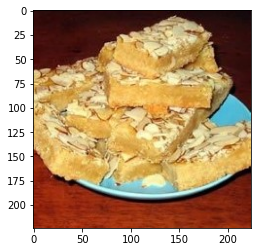

ground ing:  Butter brown sugar flour almond egg almond 

predicted ing:  Butter flour vanilla 


image


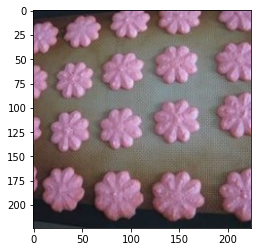

ground ing:  Butter cream cheese white sugar egg vanilla flour 

predicted ing:  Butter sugar flour vanilla 


image


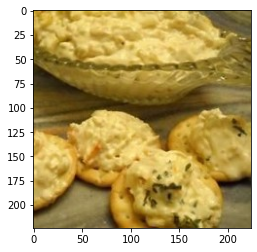

ground ing:  Cream cheese mayonnaise crab onion lemon juice hot pepper 

predicted ing:  Butter 


image


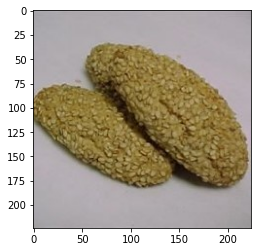

ground ing:  Flour white sugar shortening milk anise sesame 

predicted ing:  Butter salt egg vanilla 


image


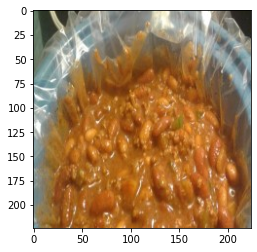

ground ing:  Ground beef onion bell pepper bean tomato chili 

predicted ing:  Chicken onion pepper 


image


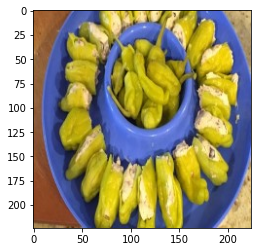

ground ing:  Bacon shallot bell pepper cream cheese milk pepper 

predicted ing:  Onion white sugar 


image


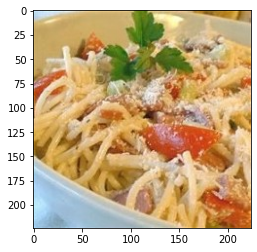

ground ing:  Spaghetti parmesan salami salad dressing tomato bell pepper 

predicted ing:  Chicken onion garlic pepper 


image


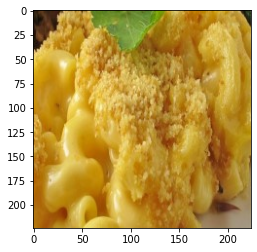

ground ing:  Macaroni butter flour milk cheddar cheese 

predicted ing:  Chicken butter white sugar 


image


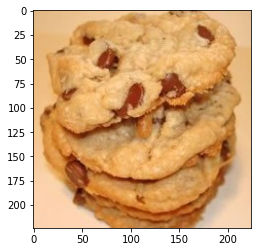

ground ing:  Butter brown sugar egg baking mix walnut chocolate 

predicted ing:  Butter flour 


image


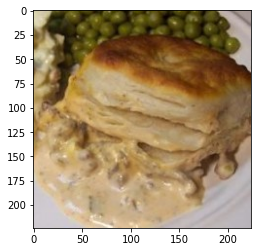

ground ing:  Ground beef cream cheese chicken ketchup milk biscuit 

predicted ing:  Chicken onion white sugar garlic 


image


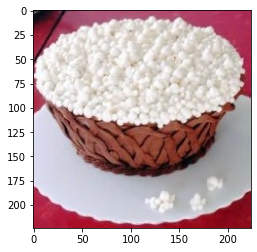

ground ing:  Butter marshmallow corn gumdrop chocolate chocolate 

predicted ing:  Butter sugar vanilla chocolate 


image


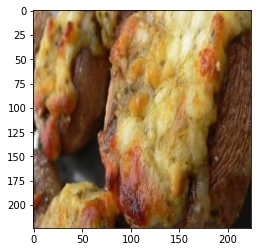

ground ing:  Mushroom olive ricotta parmesan mozzarella 4 tablespoons pesto 

predicted ing:  Chicken onion garlic 


image


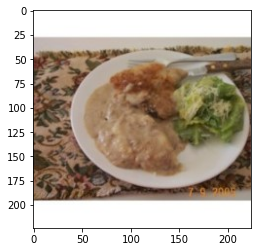

ground ing:  Bread parmesan pork chop vegetable oil mushroom milk 

predicted ing:  Chicken onion 


image


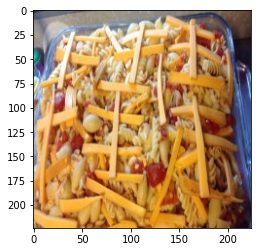

ground ing:  Macaroni ground beef tomato tomato cheddar onion 

predicted ing:  Chicken onion pepper 


image


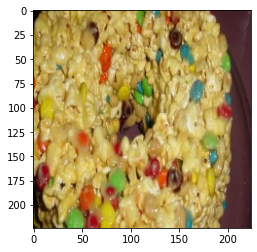

ground ing:  Corn chocolate peanut vegetable oil butter marshmallow 

predicted ing:  Butter egg 


image


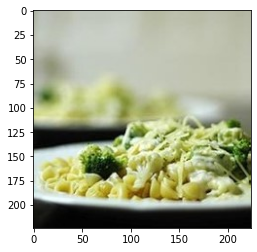

ground ing:  Whipping cream butter parmesan mozzarella cheese cheese 

predicted ing:  Chicken garlic white sugar flour pepper 


image


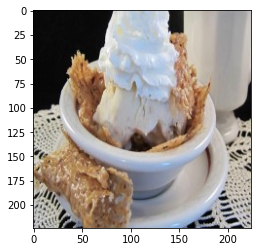

ground ing:  Pecan white sugar butter flour milk vanilla 

predicted ing:  Cream cheese white sugar egg vanilla 




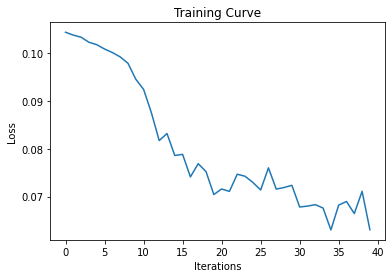

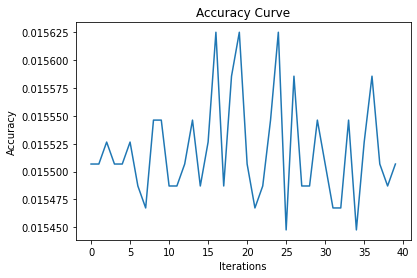

avg accuracy:  0.015518107660781844


In [41]:
batch_size = 64 
embed_size = 793
hidden_size = 1024
num_epochs = 40

# The size of the vocabulary.
vocab_size = len(ing_map) + 1

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
#encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.00008)#, betas=(0.9, 0.999), eps=1e-08)

decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
#decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.00008)#, betas=(0.9, 0.999), eps=1e-08)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.BCELoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.embed.parameters()) #+ list(encoder.bn.parameters())
optimizer = torch.optim.Adam(params, lr=0.0008)#, betas=(0.9, 0.999), eps=1e-08)

train(encoder,decoder,num_epochs,batch_size,criterion,optimizer,vocab_size)